<a href="https://colab.research.google.com/github/gabrieldorte/analise_data_pib_brasil/blob/main/Projeto_PIB_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from matplotlib import transforms
import plotly.express as px

In [3]:
#DEFINIÇÂO DAS CORES
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [4]:
#LENDO A BASE DE DADOS
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [5]:
#ANÁLISE COMPARATIVA PIB 2002 PARA 2020
#CRIANDO O DF PARA ANÀLISE
df_pib_2002 = df_pib.query("ano == 2002")[["regiao", "pib"]]
df_pib_2020 = df_pib.query("ano == 2020")[["regiao", "pib"]]


df_pib_2002 = df_pib_2002.groupby("regiao").sum().sort_values("pib", ascending = False)
df_pib_2020 = df_pib_2020.groupby("regiao").sum().sort_values("pib", ascending = False)
display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


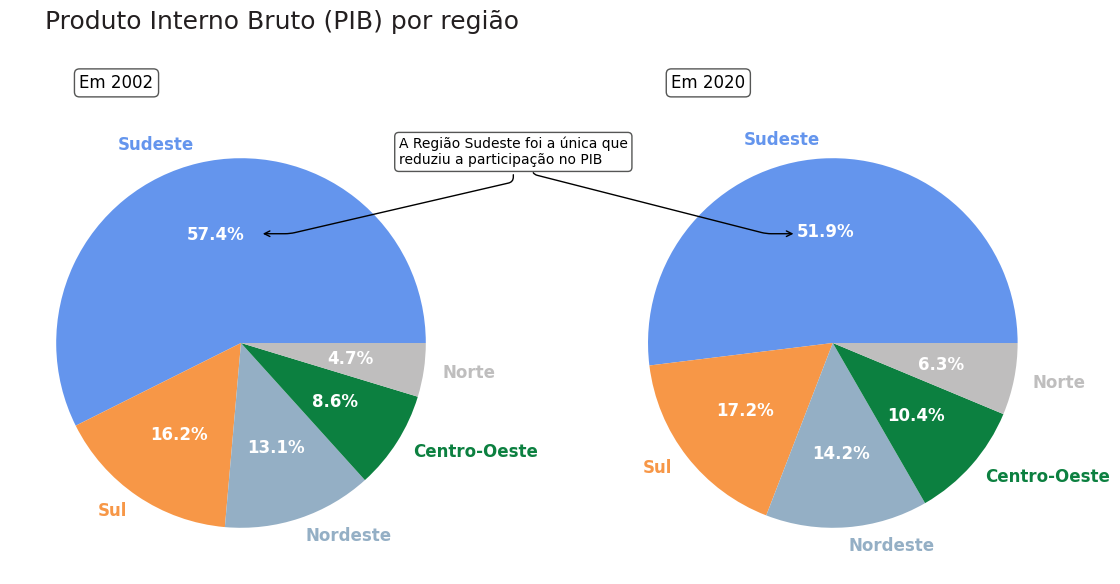

In [6]:
#GERANDO O GRÁFICO DO PIB 2002 COMPARADO COM O 2020

fig, axs = plt.subplots(1, 2, figsize=(14,6))
cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha = 'right', x = 0.5, y = 1.05)

# GRÁFICO 1 - PIB de 2002 por região
ptc, text, _ = axs[0].pie(data = df_pib_2002, x = 'pib', labels = df_pib_2002.index, autopct = "%.1f%%",
                          pctdistance = 0.6, textprops = {"size":12, "fontweight":"bold","color": BRANCO},
                          colors = cores)
axs[0].annotate("Em 2002", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# GRÁFICO 2 - PIB de 2020 por região
ptc, text, _ = axs[1].pie(data = df_pib_2020, x = 'pib', labels = df_pib_2020.index, autopct = "%.1f%%",
                          pctdistance = 0.6, textprops = {"size":12, "fontweight":"bold","color": BRANCO},
                          colors = cores)
axs[1].annotate("Em 2020", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
            xy=(180, 245), xycoords='axes points', xytext=(280, 295), textcoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5"))

axs[1].annotate('\n\n', xy=(140, 245), xycoords='axes points', xytext=(-50, 295), textcoords='axes points',
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5"))

plt.show()

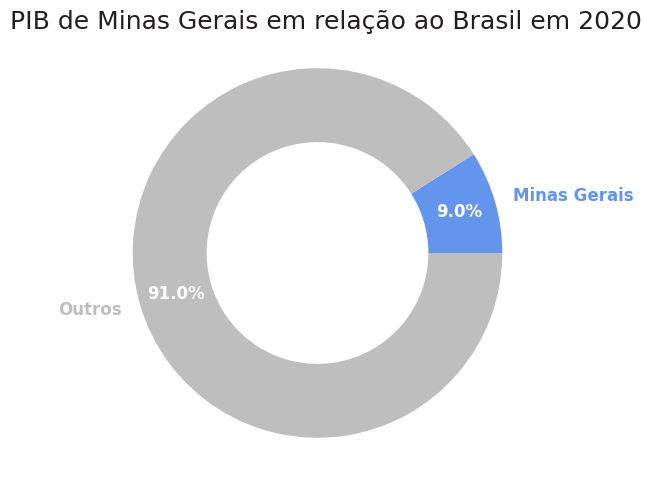

In [7]:
#Contrução Gráfico de rosca

df_mg_2020 = df_pib.query("ano == 2020")[["sigla_uf", "pib"]]
df_mg_2020.loc[df_mg_2020["sigla_uf"] == "MG", "sigla_uf"] = "Minas Gerais"
df_mg_2020.loc[df_mg_2020["sigla_uf"] != "Minas Gerais", "sigla_uf"] = "Outros"
df_mg_2020 = df_mg_2020.groupby('sigla_uf').sum()
df_mg_2020

fig, ax = plt.subplots(figsize=(6,6))
cores = [AZUL3, CINZA5]
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)
ptc, text, _ = ax.pie(data = df_mg_2020, x = "pib", labels = df_mg_2020.index, autopct = "%.1f%%",
                     startangle = 0, pctdistance= 0.8, wedgeprops = dict(width = 0.4),
                     textprops = dict(size = 12, fontweight = 'bold', color = BRANCO),
                     colors = cores)
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

In [8]:
#GRÁFICO DE DISTRIBUIÇÂO INTERNA DO PIB BAHIA
bahia = df_pib.query("sigla_uf == 'BA' and ano == 2020")[["pib", "impostos_liquidos", "va"]]
bahia.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace=True)
bahia = bahia.melt(var_name = "Indicadores", value_name = "Valores")
bahia.loc[bahia["Indicadores"] == "Impostos Líquidos", "Valores"] = bahia["Valores"]* -1
bahia["Valores_str"] = (bahia["Valores"]/1e9).map("R$ {:,.2f} BI".format)
bahia["Medidas"] = ["absolute", "relative", "total"]
bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$ 305.32 BI,absolute
1,Impostos Líquidos,-37094030606,R$ -37.09 BI,relative
2,Valor Adicionado Bruto,268226782074,R$ 268.23 BI,total


In [10]:
#Gráfico
fig = go.Figure( go.Waterfall(name = "", orientation = "v", measure = bahia["Medidas"],
                             x = bahia["Indicadores"],  y = bahia["Valores"],
                             text = bahia["Valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
              )

fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) da Bahia em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,380e9], hovermode="closest")
fig.update_yaxes(showticklabels=False)
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()